In [2]:
import torch
from torch import nn
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from ML_Cource_Final_Project.building_blocks import data_setup, engine
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/mam1680/ML_Cource_Final_Project.git
    from ML_Cource_Final_Project.building_blocks import data_setup, engine

[INFO] Couldn't find going_modular scripts... downloading them from GitHub.
Cloning into 'ML_Cource_Final_Project'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 16 (delta 1), reused 13 (delta 1), pack-reused 0
Receiving objects: 100% (16/16), 7.69 KiB | 7.69 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

device

'cuda'

In [4]:
!pip install -q kaggle

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"mam1680","key":"2dac4e1f3ab411f8c1fe5d8df1a51e66"}'}

In [6]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d yaswanthgali/sport-celebrity-image-classification
!mkdir sport-celebrity-image-classification
!unzip sport-celebrity-image-classification.zip -d sport-celebrity-image-classification

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 54% 8.00M/14.8M [00:00<00:00, 82.1MB/s]
100% 14.8M/14.8M [00:00<00:00, 114MB/s] 
Archive:  sport-celebrity-image-classification.zip
  inflating: sport-celebrity-image-classification/Sports-celebrity images/Kane Williamson/kane_(1).jpg  
  inflating: sport-celebrity-image-classification/Sports-celebrity images/Kane Williamson/kane_(10).jpg  
  inflating: sport-celebrity-image-classification/Sports-celebrity images/Kane Williamson/kane_(100).jpg  
  inflating: sport-celebrity-image-classification/Sports-celebrity images/Kane Williamson/kane_(101).jpg  
  inflating: sport-celebrity-image-classification/Sports-celebrity images/Kane Williamson/kane_(102).jpg  
  inflating: sport-celebrity-image-classification/Sports-celebrity images/Kane Williamson/kane_(103).jpg  
  inflating: sport-celebrity-image-classification/Sports-celebrity images/Kane Williamson/kane_(104).jpg  
  inflating: sport-celebrity-image-classification/Sports-cele

In [7]:
import os
os.remove("sport-celebrity-image-classification.zip")

In [8]:
from pathlib import Path

data_path = Path("sport-celebrity-image-classification/Sports-celebrity images")

data_path.is_dir()

True

In [9]:
# Split Dataset into train, test set

test_size = 0.2
import random
import math
import shutil

train_dir =  Path("train")
test_dir = Path("test")

train_dir.mkdir(parents=True, exist_ok=True)
test_dir.mkdir(parents=True, exist_ok=True)



for dir in os.listdir(data_path):
  class_dir = dir
  num_test_images = test_size * len(os.listdir(str(data_path) + "/" + class_dir))
  random_test_images = random.sample(os.listdir(str(data_path) + "/" + class_dir), k=int(num_test_images))
  train_images = [img for img in os.listdir(str(data_path) + "/" + class_dir) if img not in random_test_images]
  print(len(train_images), len(random_test_images))
  train_class_path = Path(str(train_dir) + "/" + class_dir)
  test_class_path = Path(str(test_dir) + "/" + class_dir)
  train_class_path.mkdir(parents=True, exist_ok=True)
  test_class_path.mkdir(parents=True, exist_ok=True)

  for train_image in train_images:
    shutil.copy(str(data_path) + "/" + class_dir + "/" + train_image, str(train_class_path) + "/" + train_image)
  for test_image in random_test_images:
    shutil.copy(str(data_path) + "/" + class_dir + "/" + test_image, str(test_class_path) + "/" + test_image)

88 21
96 23
83 20
88 22


In [10]:
from pathlib import Path
train_dir = Path("train")
test_dir = Path("test")

train_dir.is_dir(), test_dir.is_dir()

(True, True)

In [11]:
def plot_random_images(dir, k=5, seed=None):
    image_list = list(dir.glob("*/*.jpg"))
    if seed:
        random.seed(seed)
    random_image_samples = random.sample(image_list, k=k)
    for str_image in random_image_samples:
        image = Path(str_image)
        image_name = image.stem
        class_name = image_name.split("_")[0]
        img = Image.open(image)
        title = f"Class: {class_name} | Image size: {img.size}"
        plt.figure(figsize=(10, 7))
        plt.imshow(img)
        plt.title(f"Class: {class_name} | Image size: {img.size}")
        plt.axis(False);

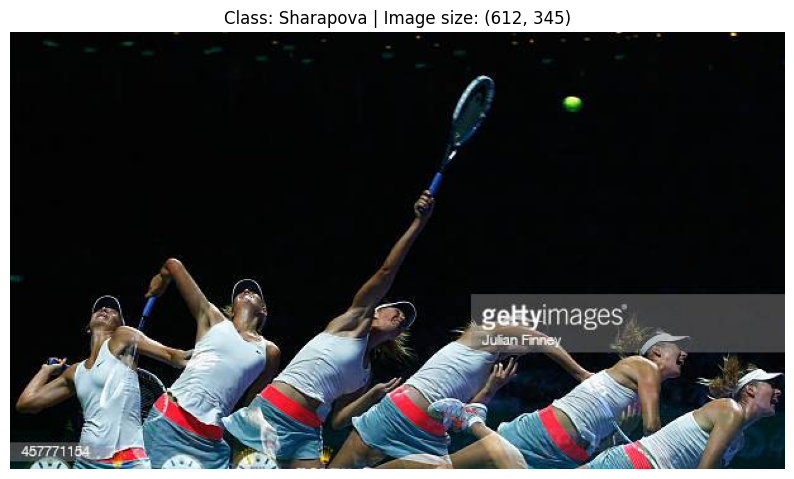

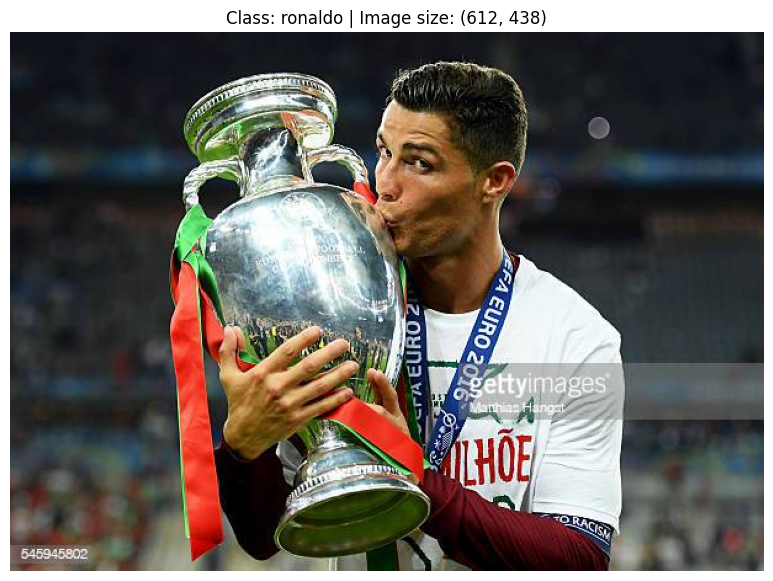

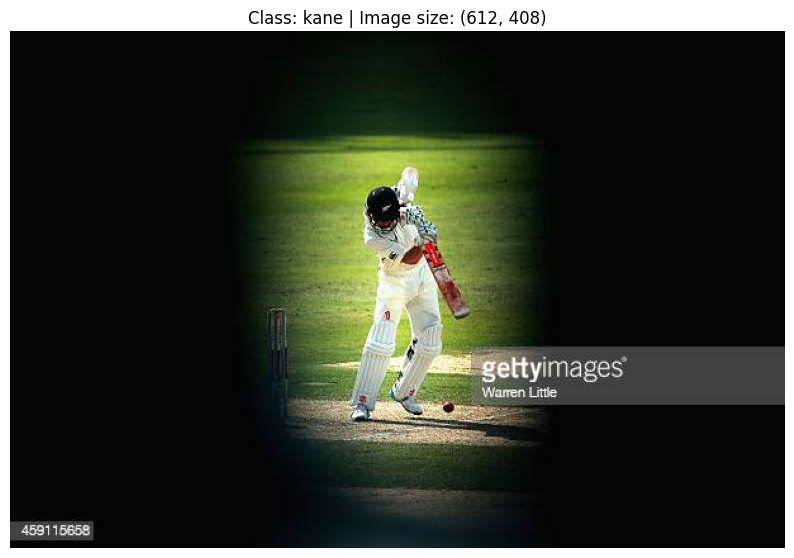

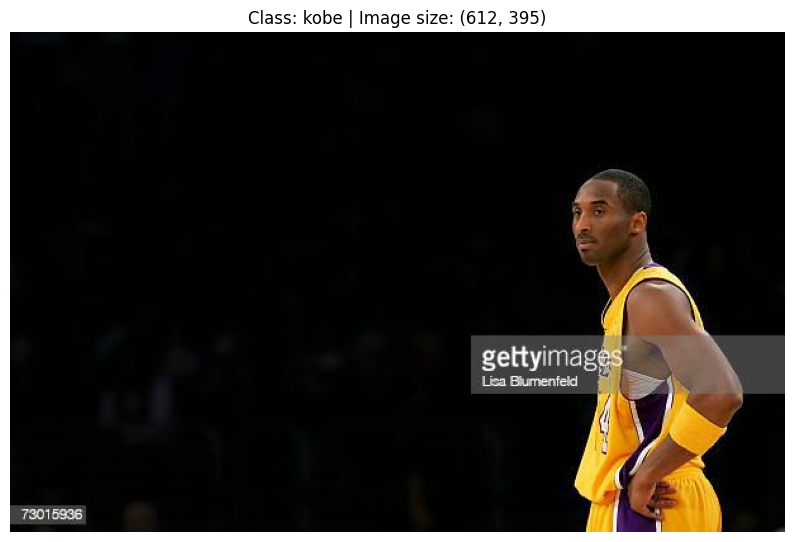

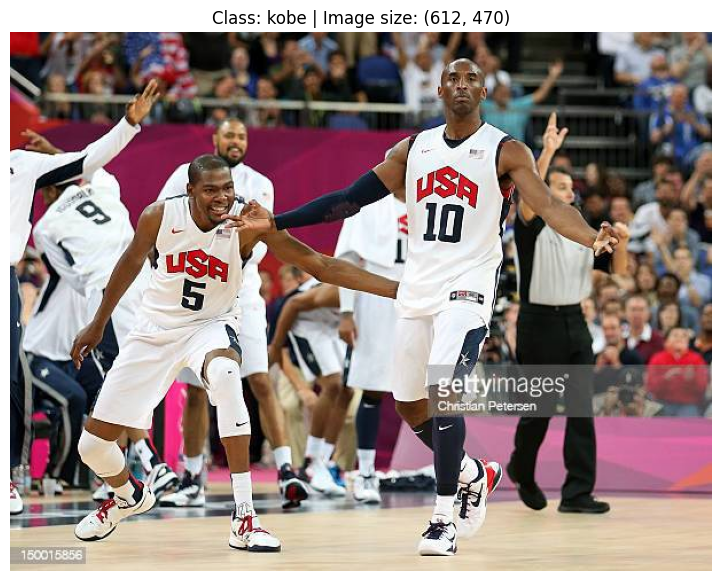

In [12]:
plot_random_images(data_path)

In [13]:
weights = torchvision.models.ResNet50_Weights.DEFAULT

auto_transform = weights.transforms()


weights, auto_transform

(ResNet50_Weights.IMAGENET1K_V2,
 ImageClassification(
     crop_size=[224]
     resize_size=[232]
     mean=[0.485, 0.456, 0.406]
     std=[0.229, 0.224, 0.225]
     interpolation=InterpolationMode.BILINEAR
 ))

In [14]:
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir, test_dir=test_dir, transform=auto_transform, batch_size=32)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7b52b25831c0>,
 ['Kane Williamson', 'Kobe Bryant', 'Maria Sharapova', 'Ronaldo'])

In [16]:
train_dataloader_sample_img, train_dataloader_sample_label = next(iter(train_dataloader))

train_dataloader_sample_img.shape, train_dataloader_sample_label.shape

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [15]:
# for milestone 2

# model = torchvision.models.resnet50(weights=weights).to(device)
# model


In [16]:
# for milestone 2

# summary(model=model,
#         input_size=(1, 3, 224, 224), # example of [batch_size, color_channels, height, width]
#         col_names=["input_size", "output_size", "kernel_size", "num_params", "trainable"],
#         col_width=20,
#         row_settings=["var_names"],
#         depth=10)

In [17]:
# for milestone 2

# for param in model.conv1.parameters():
#   param.requires_grad = False


# for param in model.bn1.parameters():
#   param.requires_grad = False

# for param in model.layer1.parameters():
#   param.requires_grad = False

# for param in model.layer2.parameters():
#   param.requires_grad = False

# for param in model.layer3.parameters():
#   param.requires_grad = False

# for param in model.layer4.parameters():
#   param.requires_grad = False

In [18]:
# for milestone 2

# summary(model=model,
#         input_size=(1, 3, 224, 224), # example of [batch_size, color_channels, height, width]
#         col_names=["input_size", "output_size", "kernel_size", "num_params", "trainable"],
#         col_width=20,
#         row_settings=["var_names"],
#         depth=10)

In [19]:
# for milestone 2

# model.fc = nn.Sequential(
#     nn.Linear(in_features=2048, out_features=len(class_names))
# ).to(device)


# model.fc